In [1]:
from google.colab import files
uploaded=files.upload()

Saving Tulip-season-Amsterdam-2022.jpg to Tulip-season-Amsterdam-2022.jpg


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [4]:
train_generator = train_datagen.flow_from_directory(
        'flowers/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='training',
        classes=['rose', 'tulip'])

Found 0 images belonging to 2 classes.


In [17]:
validation_generator = train_datagen.flow_from_directory(
        'flowers/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='validation',
        classes=['rose', 'tulip'])

Found 0 images belonging to 2 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
print ((0.5447,0.7071))

(0.5447, 0.7071)


In [22]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt


def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img = img.astype("float") / 255.0
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

In [23]:
def display_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

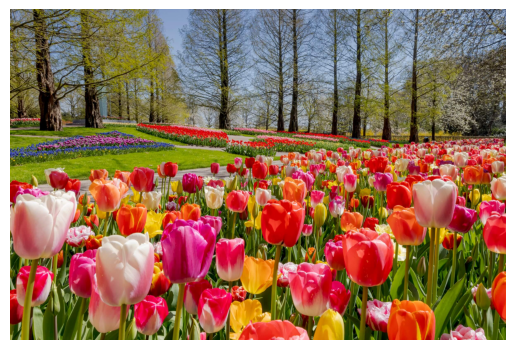

1/1 [==============================] - 0s 322ms/step


In [24]:
sample_image_path = '/content/Tulip-season-Amsterdam-2022.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)

In [25]:
if prediction > 0.4:
    print("Tulip")
else:
    print("Rose")

Tulip


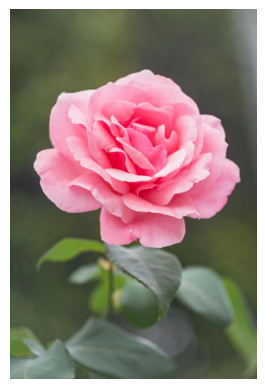

1/1 [==============================] - 0s 61ms/step


In [26]:
sample_image_path = '/content/rose.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)

In [31]:
if prediction > 0.4:
    print("Rose")
else:
    print("Tulip")

Rose
